<a href="https://colab.research.google.com/github/DSWoodin/Practice/blob/main/PKNU_5th/01_DA/03_DataInOut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 강의 분량
* 07월08일(월) 2시간

### 강의 자료
* 판다스데이터분석_02데이터입출력

### 이 장에서 배우는 것
* Google Drive 마운트
* CSV 파일 읽기 read_csv()
* Excel 파일 읽기 read_excel()
* JSON 파일 읽기 read_json()
* 웹에서 표 정보 읽기 read_html()
* 웹 스크래핑, 뷰티풀수프 활용
* API 활용한 데이터 수집
* CSV 파일 저장 to_csv()
* Excel 파일 저장 to_excel()
* JSON 파일 저장 to_json()
* 여러개의 데이터프레임을 하나의 Excel 파일 저장 Excelwriter()

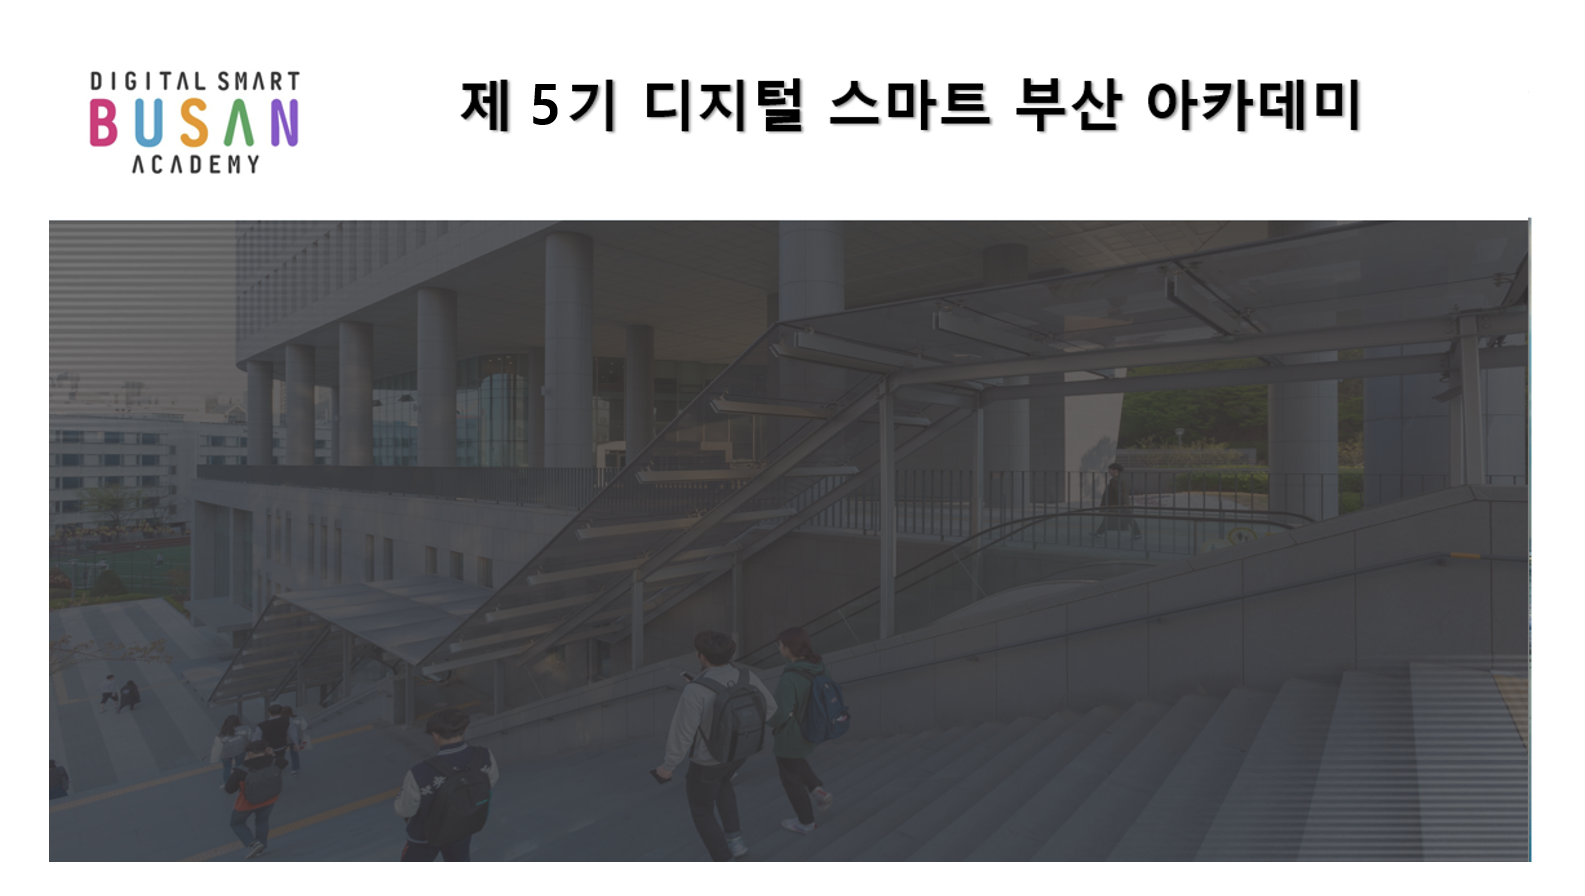

# **02 데이터 입출력**

# 1. 외부 파일 읽어오기

|File Format|Reader|Write|
|------|---|---|
|CSV|read_csv|to_csv|
|JSON|read_json|to_json|
|HTML|read_html|to_html|
|Local clipboard|read_clipboard|to_clipboard|
|MS Excel|read_excel|to_excel|
|HDF5 Format|read_hdf|to_hdf|
|SQL|read_sql|to_sql|

## 1-1 CSV 파일

```
CSV 파일 --> 데이터 프레임: pandas.read_csv("파일 경로(이름)")
```

* [그림] CSV 파일 읽기 - header 옵션 비교

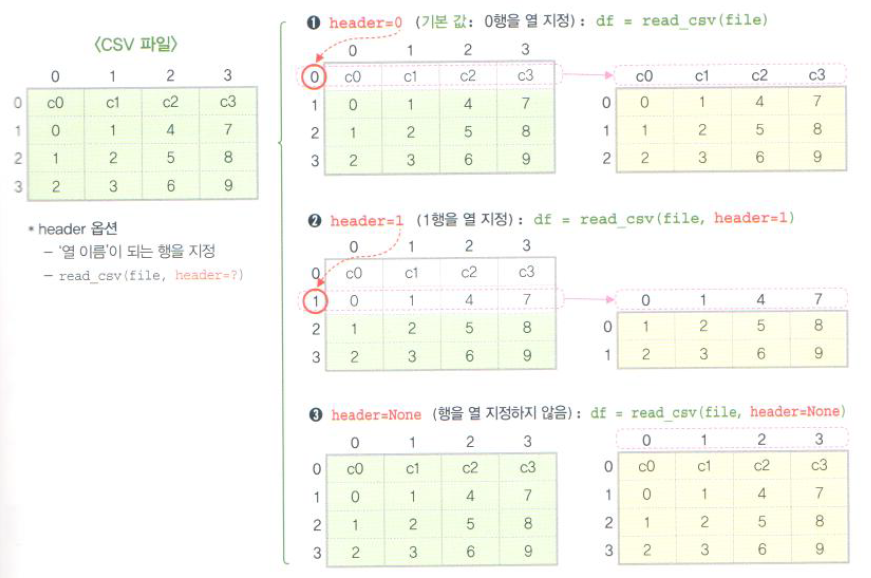

* [그림] CSV 파일 읽기 - index_col 옵션 비교

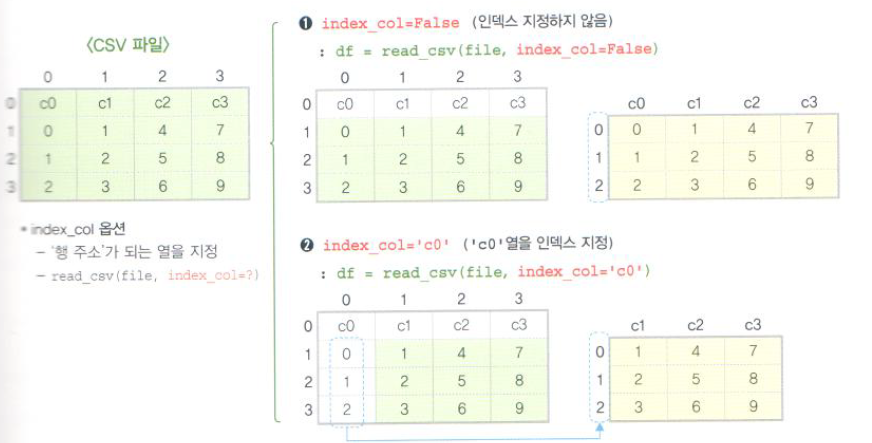



In [ ]:
# <예제 2-1> CSV 파일 읽기
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd

# 파일경로를 찾고, 변수 file_path에 저장
# 구글 드라이브 mount 사용 -> data_데이터분석
from google.colab import drive
drive.mount('/content/drive')
file_path = ('/content/drive/MyDrive/data_데이터분석/2장자료/read_csv_sample.csv')

# read_csv() 함수로 데이터프레임 변환. 변수 df1에 저장
df1 = pd.read_csv(file_path)
print(df1)
print('\n')

# read_csv() 함수로 데이터프레임 변환. 변수 df2에 저장. header=None 옵션
df2 = pd.read_csv(file_path, header=None)
print(df2)
print('\n')

# read_csv() 함수로 데이터프레임 변환. 변수 df3에 저장. index_col=None 옵션
df3 = pd.read_csv(file_path, index_col=None)
print(df3)
print('\n')

# read_csv() 함수로 데이터프레임 변환. 변수 df4에 저장. index_col='c0' 옵션
df4 = pd.read_csv(file_path, index_col='c0')
print(df4)

Mounted at /content/drive
   c0  c1  c2  c3
0   0   1   4   7
1   1   2   5   8
2   2   3   6   9


    0   1   2   3
0  c0  c1  c2  c3
1   0   1   4   7
2   1   2   5   8
3   2   3   6   9


   c0  c1  c2  c3
0   0   1   4   7
1   1   2   5   8
2   2   3   6   9


    c1  c2  c3
c0            
0    1   4   7
1    2   5   8
2    3   6   9


* [표] read_csv() 함수의 옵션

|옵션|설명|
|------|---|
|path|파일의 위치(파일의 위치(파일명 포함), URL|
|sep(또는 delimiter)|텍스트 데이터를 필드별로 구분하는 문자|
|header|열 이름으로 사용될 행의 번호(기본값은 0), header가 없고 첫 행부터 데이터가 있는 경우 None으로 지정 가능|
|index_col|행 인덱스로 사용할 열의 번호 또는 열 이름|
|names|열 이름으로 사용할 문자열의 리스트|
|skiprows|처음 몇 줄을 skip할 것인지 설정(숫자 입력), skip하려는 행의 번호를 담은 리스트로 설정 가능(예:[1,3,5])|
|parse_dates|날짜 텍스트를 datetime64로 변환할 것인지 설정(기본값은 False)|
|skip_footer|마지막 몇 줄을 skip할 것인지 설정(숫자 입력)|
|encoding|텍스트 인코딩 종류를 지정(에: 'uf-8')|

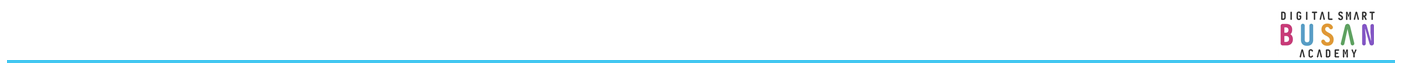

## 1-2 Excel 파일

```
Excel 파일 --> 데이터 프레임: pandas.read_excel("파일 경로(이름)")
```

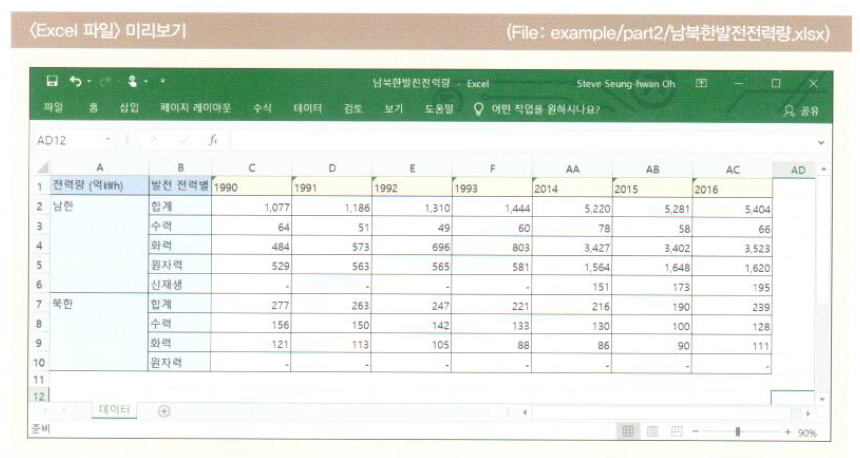



In [ ]:
# <예제 2-2> Excel 파일 읽기
# -*- coding: utf-8 -*-

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
file_path = ('/content/drive/MyDrive/data_데이터분석/2장자료/남북한발전전력량.xlsx')

# read_excel() 함수로 데이터프레임 변환
df1 = pd.read_excel(file_path, engine='openpyxl')            # header=0 (default 옵션)
df2 = pd.read_excel(file_path, engine='openpyxl',
                    header=None)  # header=None 옵션

# 데이터프레임 출력
print(df1)
print('\n')
print(df2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  전력량 (억㎾h) 발전 전력별  1990  1991  1992  1993  1994  1995  1996  1997  ...  2007  \
0        남한     합계  1077  1186  1310  1444  1650  1847  2055  2244  ...  4031   
1       NaN     수력    64    51    49    60    41    55    52    54  ...    50   
2       NaN     화력   484   573   696   803  1022  1122  1264  1420  ...  2551   
3       NaN    원자력   529   563   565   581   587   670   739   771  ...  1429   
4       NaN    신재생     -     -     -     -     -     -     -     -  ...     -   
5        북한     합계   277   263   247   221   231   230   213   193  ...   236   
6       NaN     수력   156   150   142   133   138   142   125   107  ...   133   
7       NaN     화력   121   113   105    88    93    88    88    86  ...   103   
8       NaN    원자력     -     -     -     -     -     -     -     -  ...     -   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0 

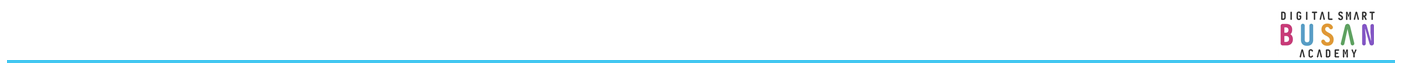

## 1-3 JSON 파일

```
JSON 파일 --> 데이터 프레임: pandas.read_json("파일 경로(이름)")
```


* <JSON 파일> 미리보기

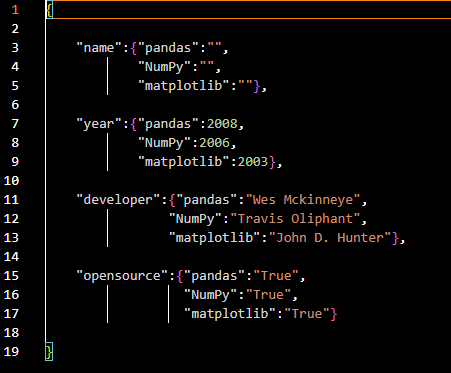



In [ ]:
# <예제 2-3> JSON 파일 읽기
# -*- coding: utf-8 -*-

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
file_path = ('/content/drive/MyDrive/data_데이터분석/2장자료/read_json_sample.json')

# read_json() 함수로 데이터프레임 변환
df = pd.read_json(file_path)
print(df)
print('\n')
print(df.index)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           name  year        developer opensource
pandas           2008    Wes Mckinneye       True
NumPy            2006  Travis Oliphant       True
matplotlib       2003   John D. Hunter       True


Index(['pandas', 'NumPy', 'matplotlib'], dtype='object')


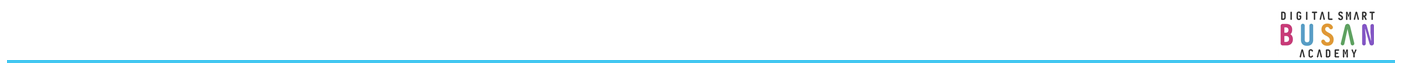

# 2. 웹(web)에서 가져오기

## 2-1 HTML 웹 페이지에서 표 속성 가져오기

* [그림] HTML 페이지의 표 가져오기

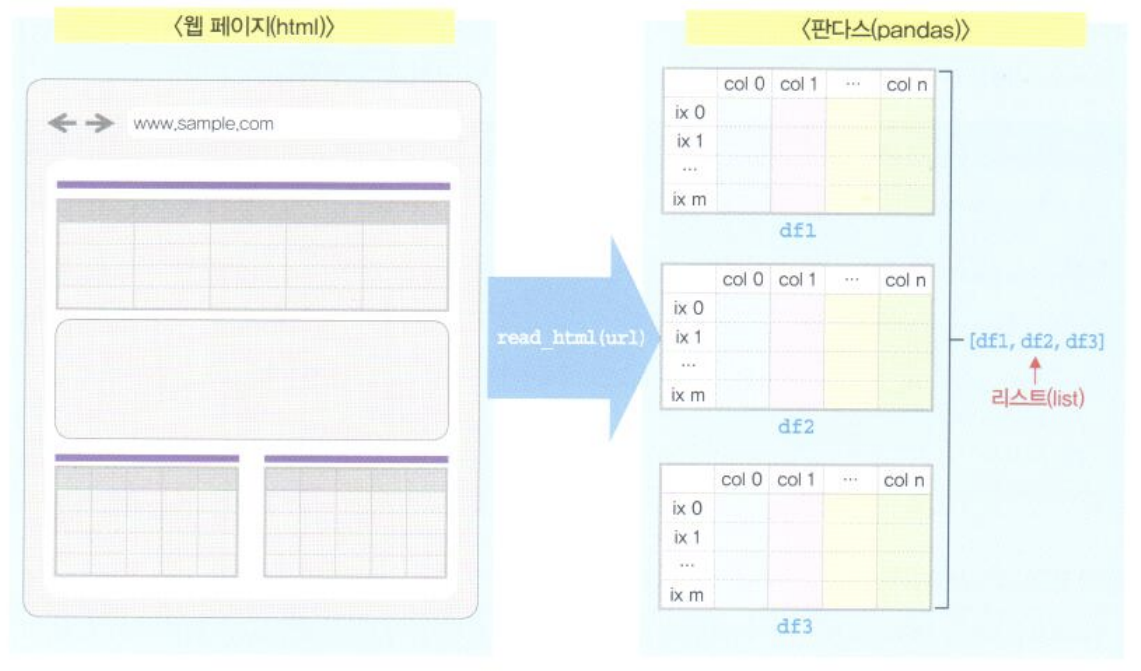


```
HTML 표 속성 읽기: pandas.read_html("웹 주소(URL)" 또는 "HTML 파일 경로(이름)")
```




In [ ]:
from collections import UserList
# <예제 2-4> 웹에서 표 정보 읽기
# -*- coding: utf-8 -*-

import pandas as pd

# HTML 파일 경로 or 웹 페이지 주소를 url 변수에 저장
from google.colab import drive
drive.mount('/content/drive')
url = ('/content/drive/MyDrive/data_데이터분석/2장자료/sample.html')

# HTML 웹페이지의 표(table)를 가져와서 데이터프레임으로 변환
tables = pd.read_html(url)

# 표(table)의 개수 확인
print(len(tables))
print('\n')

# tables 리스트의 원소를 iteration하면서 각각 화면 출력
for i in range(len(tables)):
    print("tables[%s]" % i)
    print(tables[i])
    print('\n')

# 파이썬 패키지 정보가 들어 있는 두 번째 데이터프레임을 선택하여 df 변수에 저장
df = tables[1]

# 'name' 열을 인덱스로 지정
df.set_index(['name'], inplace=True)
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2


tables[0]
   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9


tables[1]
         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True


            year        developer  opensource
name                                         
NumPy       2006  Travis Oliphant        True
matplotlib  2003   John D. Hunter        True
pandas      2008    Wes Mckinneye        True


In [ ]:
url = 'https://finance.naver.com/item/main.nhn?code=005930'
tables = pd.read_html(url, encoding='euc-kr')
print(len(tables))
tables[0]

/usr/local/lib/python3.10/dist-packages/bs4/__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


13


0                                        1  \
0  전일  76,100  76,100  고가  77,80077,800  (상한가  98,90098,900  )   
1    시가  77,40077,400        저가  77,00077,000  (하한가  53,300  )   

                            2  
0   거래량  9,829,336  9,829,336  
1  거래대금  760,175  760,175  백만

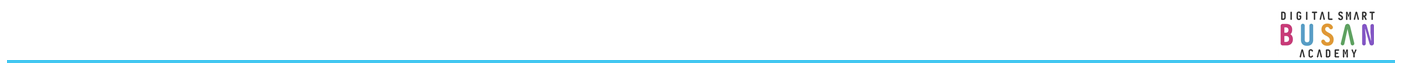

## 2-2 웹 스크래핑

* 웹사이트 개편으로 오류가 발생할 수도 있다.
  * etfs[etf_ticker[0]] = [etf_market[0], etf_name[0]]와 같이 리스트를 원소로 갖는 딕셔너리를 정의하는 방법 기어


In [ ]:
# <예제 2-5> 미국 ETF 리스트 가져오기
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

# 위키피디아 미국 ETF 웹 페이지에서 필요한 정보를 스크래핑하여 딕셔너리 형태로 변수 etfs에 저장
url = "https://en.wikipedia.org/wiki/List_of_American_exchange-traded_funds"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'lxml')
rows = soup.select('div > ul > li')

etfs = {}
for row in rows:

    try:
        etf_name = re.findall('^(.*) \(NYSE', row.text)
        etf_market = re.findall('\((.*)\|', row.text)
        etf_ticker = re.findall('NYSE Arca\|(.*)\)', row.text)

        if (len(etf_ticker) > 0) & (len(etf_market) > 0) & (len(etf_name) > 0):
            etfs[etf_ticker[0]] = [etf_market[0], etf_name[0]]

    except AttributeError as err:
        pass

# etfs 딕셔너리 출력
print(etfs)
print('\n')

# etfs 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame(etfs)
print(df)

{}


Empty DataFrame
Columns: []
Index: []


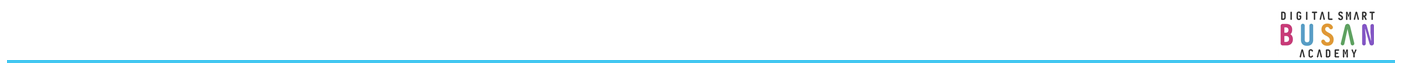

# 3. API 활용하여 데이터 수집하기
* 구글 지오코딩 API(장소 이름 또는 주소를 입력하면 위도와 경도 정보를 변환해 주는 서비스) 발급 절차
  1. 구글 지도 서비스(https://cloud.google.com/maps-platform/places/?hl=ko) 접속
  2. 새 프로젝트 만들기(무료 평가판은 사용 가능하지만 신용카드 정보 등록 필요)
  3. API 설정
  4. 사용자 인증
  5. API 키 발급(외부에 유출되지 않도록 관리에 유의)

  * 구글 지오코딩 서비스가 유료로 전환됨에 따라 무료 사용량을 초과할 경우 요금을 지불해야 하는 상황이 발생할 수 있다.

* 파이썬 환경에서 구글 지오코딩을 사용하기 위해서 googlemaps 라이브러리 설치
```
conda install -c conda-forge googlemaps
```

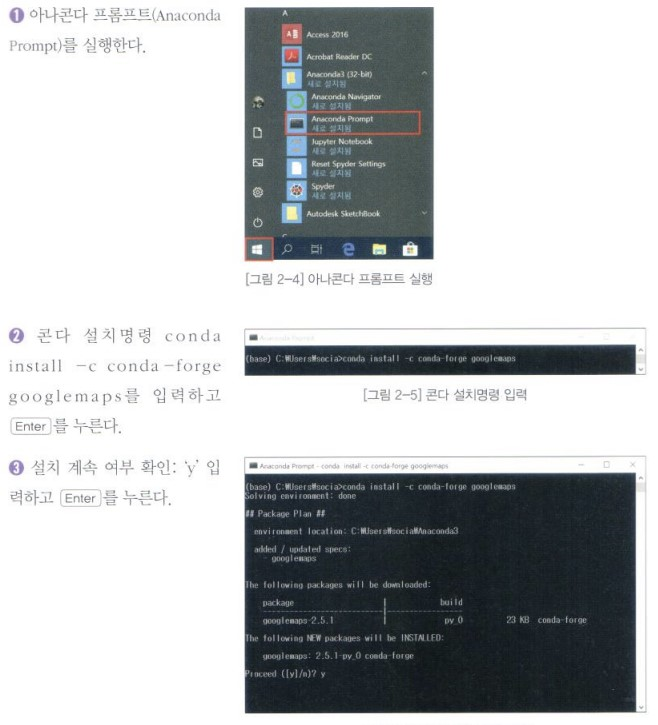

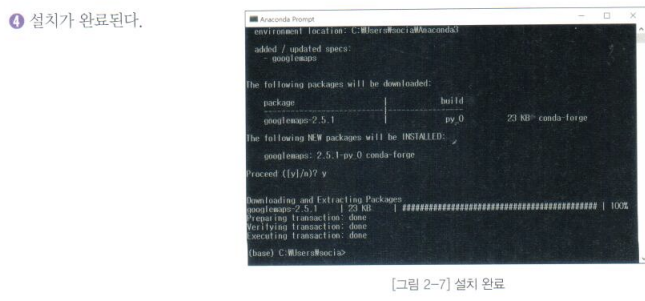

* 구글 지오코딩 API를 사용하여 "해운대해수욕장" 위치 정보 확인
  * 'lat'는 위도, 'ㅣng'는 경도

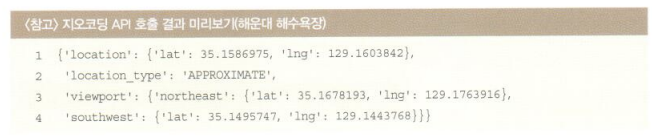



* 아래 <예제 2-6>는 발급받은 API 키의 보안상 run하지 않겠음

In [ ]:
# <예제 2-6> 구글 지오코딩 위치 정보
# -*- coding: utf-8 -*-

## google 지오코딩 API 통해 위도, 경도 데이터 가져오기

# 라이브러리 가져오기
import googlemaps
import pandas as pd

# my_key = "----발급받은 API 키를 입력-----"

# 구글맵스 객체 생성하기
maps = googlemaps.Client(key=my_key)  # my key값 입력

lat = []  #위도
lng = []  #경도

# 장소(또는 주소) 리스트
places = ["서울시청", "국립국악원", "해운대해수욕장"]

i=0
for place in places:
    i = i + 1
    try:
        print(i, place)
        # 지오코딩 API 결과값 호출하여 geo_location 변수에 저장
        geo_location = maps.geocode(place)[0].get('geometry')
        lat.append(geo_location['location']['lat'])
        lng.append(geo_location['location']['lng'])

    except:
        lat.append('')
        lng.append('')
        print(i)

# 데이터프레임으로 변환하기
df = pd.DataFrame({'위도':lat, '경도':lng}, index=places)
print('\n')
print(df)

ModuleNotFoundError: No module named 'googlemaps'

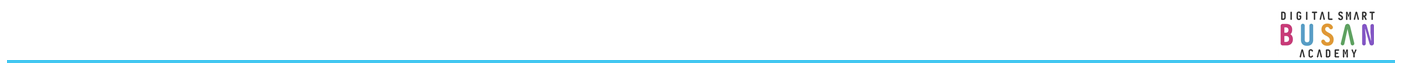

# 4. 데이터 저장하기

## 4-1 CSV 파일로 저장

```
CSV 파일로 저장: DataFrame 객체.to_csv("파일 이름(경로)")
```



In [ ]:
# <예제 2-7> CSV 파일로 저장
# -*- coding: utf-8 -*-

import pandas as pd

# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장
data = {'name' : [ 'Jerry', 'Riah', 'Paul'],
        'algol' : [ "A", "A+", "B"],
        'basic' : [ "C", "B", "B+"],
        'c++' : [ "B+", "C", "C+"],
        }

df = pd.DataFrame(data)
df.set_index('name', inplace=True)   #name 열을 인덱스로 지정
print(df)

# to_csv() 메소드를 사용하여 CSV 파일로 내보내기. 파열명은 df_sample.csv로 저장
df.to_csv("./df_sample.csv")

      algol basic c++
name                 
Jerry     A     C  B+
Riah     A+     B   C
Paul      B    B+  C+


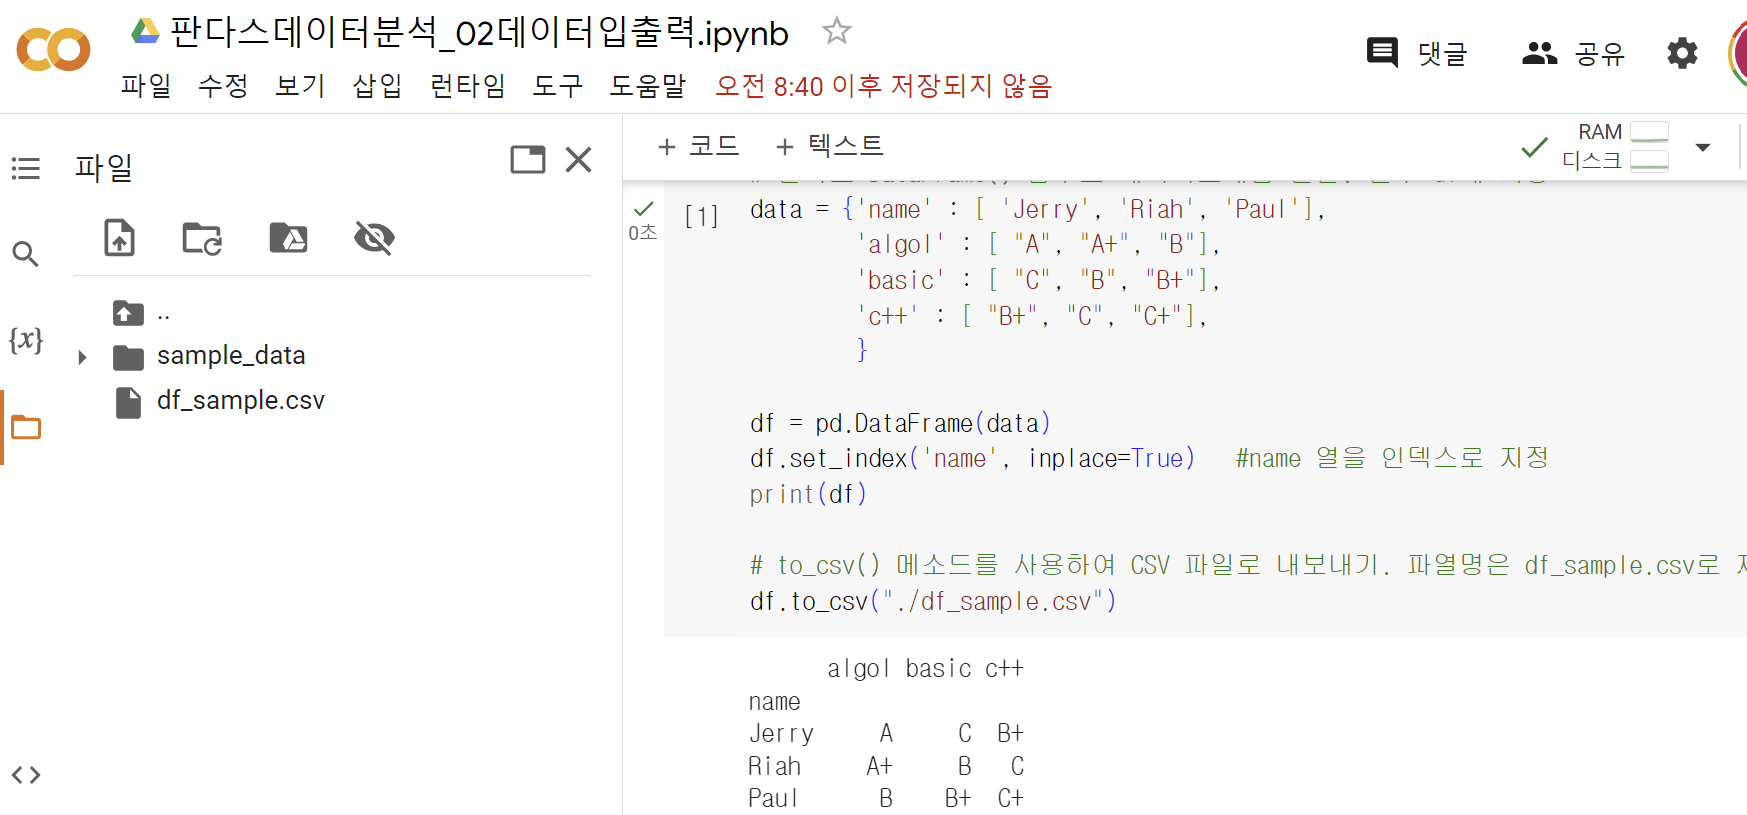

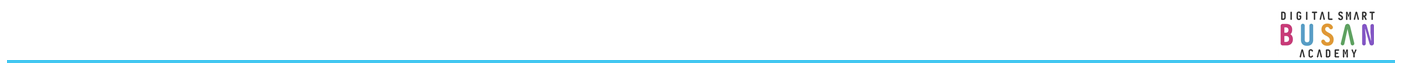

## 4-2 JSON 파일로 저장

```
JSON 파일로 저장: DataFrame 객체.to_json("파일 이름(경로)")
```




In [ ]:
# <예제 2-8> JSON 파일로 저장
# -*- coding: utf-8 -*-

import pandas as pd

# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장
data = {'name' : [ 'Jerry', 'Riah', 'Paul'],
        'algol' : [ "A", "A+", "B"],
        'basic' : [ "C", "B", "B+"],
        'c++' : [ "B+", "C", "C+"],
        }

df = pd.DataFrame(data)
df.set_index('name', inplace=True)   #name 열을 인덱스로 지정
print(df)

# to_json() 메소드를 사용하여 JSON 파일로 내보내기. 파열명은 df_sample.json로 저장
df.to_json("./df_sample.json")

      algol basic c++
name                 
Jerry     A     C  B+
Riah     A+     B   C
Paul      B    B+  C+


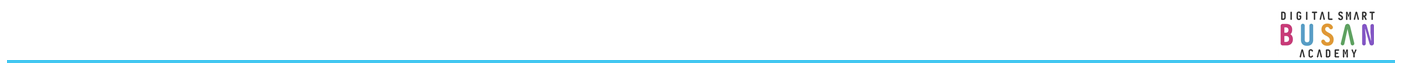

## 4-3 Excel 파일로 저장

```
Excel 파일로 저장: DataFrame 객체.to_excel("파일 이름(경로)")
```




In [ ]:
# <예제 2-9> Excel 파일로 저장
# -*- coding: utf-8 -*-

import pandas as pd

# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df에 저장
data = {'name' : [ 'Jerry', 'Riah', 'Paul'],
        'algol' : [ "A", "A+", "B"],
        'basic' : [ "C", "B", "B+"],
        'c++' : [ "B+", "C", "C+"],
        }

df = pd.DataFrame(data)
df.set_index('name', inplace=True)   #name 열을 인덱스로 지정
print(df)

# to_excel() 메소드를 사용하여 엑셀 파일로 내보내기. 파열명은 df_sample.xlsx로 저장
df.to_excel("./df_sample.xlsx")

      algol basic c++
name                 
Jerry     A     C  B+
Riah     A+     B   C
Paul      B    B+  C+


* <실행 결과> Excel 파일 내용 보기

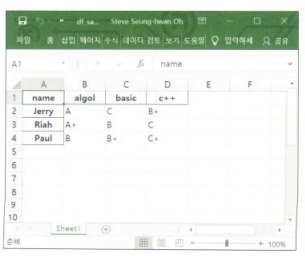

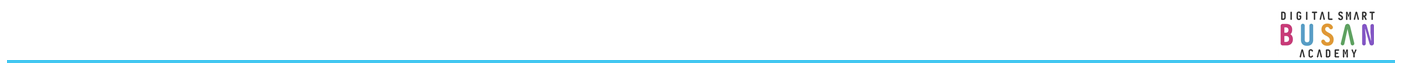

## 4-4 여러 개의 데이터프레임을 하나의 Excel 파일로 저장

```
데이터프레임 여러 개를 Excel 파일로 저장: pandas.ExcelWriter("파일 이름(경로)")
```




In [ ]:
# <예제 2-10> ExcelWriter() 활용
# -*- coding: utf-8 -*-

import pandas as pd

# 판다스 DataFrame() 함수로 데이터프레임 변환. 변수 df1, df2에 저장
data1 = {'name' : [ 'Jerry', 'Riah', 'Paul'],
         'algol' : [ "A", "A+", "B"],
         'basic' : [ "C", "B", "B+"],
          'c++' : [ "B+", "C", "C+"]}

data2 = {'c0':[1,2,3],
         'c1':[4,5,6],
         'c2':[7,8,9],
         'c3':[10,11,12],
         'c4':[13,14,15]}

df1 = pd.DataFrame(data1)
df1.set_index('name', inplace=True)      #name 열을 인덱스로 지정
print(df1)
print('\n')

df2 = pd.DataFrame(data2)
df2.set_index('c0', inplace=True)        #c0 열을 인덱스로 지정
print(df2)

# df1을 'sheet1'으로, df2를 'sheet2'로 저장 (엑셀파일명은 "df_excelwriter.xlsx")
writer = pd.ExcelWriter("./df_excelwriter.xlsx")
df1.to_excel(writer, sheet_name="sheet1")
df2.to_excel(writer, sheet_name="sheet2")
writer.close()

      algol basic c++
name                 
Jerry     A     C  B+
Riah     A+     B   C
Paul      B    B+  C+


    c1  c2  c3  c4
c0                
1    4   7  10  13
2    5   8  11  14
3    6   9  12  15


* <실행 결과> Excel 파일 내용 보기

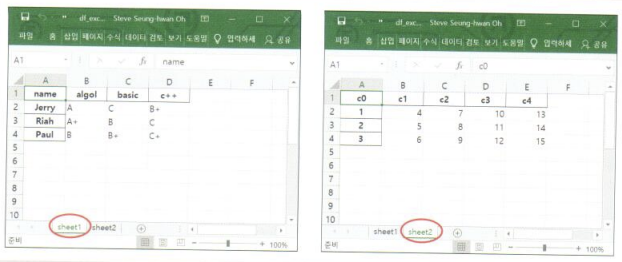

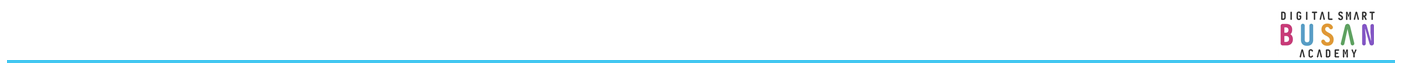